# Time series
*This notebook illustrates methods to implement tasks using time series*
***
Alessandro Tufano 2020

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys; sys.path.insert(0, '..') #add the above level with the package
from logproj import stat_time_series as ts

### Random generation of time series

In [2]:
#Implementation of random functions to generate the time series
numeroRecord=50
x=np.arange(0,numeroRecord)
y1=x+3
y2=np.cos(x)*20
y3=np.random.randn(1, numeroRecord)

### Generation of an additive time series

Text(0, 0.5, 'Value')

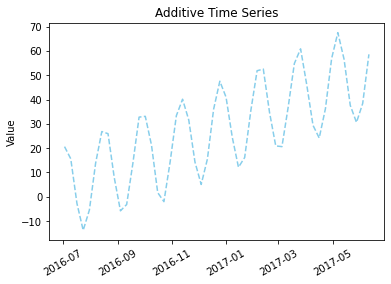

In [3]:
#create an additive time series
y=y1+y2+y3
y=np.transpose(y)
addSeries = pd.DataFrame(y, index = pd.date_range('7/1/2016', freq = 'w', periods = numeroRecord), columns = ['Series'])

#plot the time series
plt.plot(addSeries.Series,'--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Additive Time Series')
plt.ylabel('Value')

### Generation of a multiplicative time series

Text(0, 0.5, 'Value')

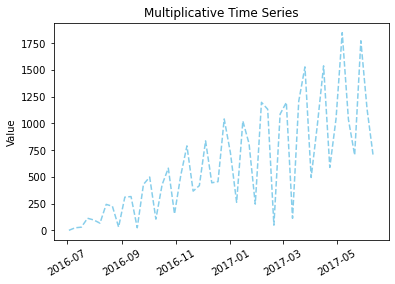

In [4]:
# multiplicative Time series
numeroRecord=50
x=np.arange(0,numeroRecord)
y1=x*2
y2=abs(np.cos(x)*20 + 1)
y3=1
y=y1*y2*y3
y=np.transpose(y)
mulSeries = pd.DataFrame(y, index = pd.date_range('7/1/2016', freq = 'w', periods = numeroRecord), columns = ['Series'])

plt.plot(mulSeries.Series,'k--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Multiplicative Time Series')
plt.ylabel('Value')

### Comparison between additive and multiplicative TS

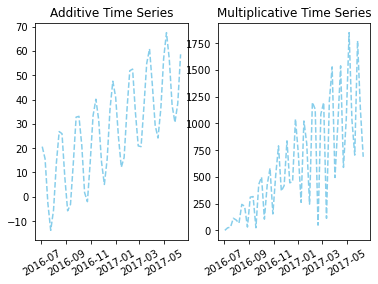

In [5]:
plt.subplot(121) 
plt.plot(addSeries.Series,'--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Additive Time Series')
plt.subplot(122) 
plt.plot(mulSeries.Series,'k--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Multiplicative Time Series')
plt.rcParams['figure.figsize'] = [20, 10] #[width height] #set figure size

### Definition of autocorrelation functions (ACF, PACF)

C:\Users\aletu\.conda\envs\logproj\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
C:\Users\aletu\.conda\envs\logproj\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
..\logproj\stat_time_series.py:115: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag_acf,linefmt='skyblue',markerfmt='d')
..\logproj\stat_time_series.py:125: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the pe

(<matplotlib.axes._subplots.AxesSubplot at 0x1750bcf70f0>,
 array([ 1,  2,  5,  6,  7, 12, 20], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 21], dtype=int64))

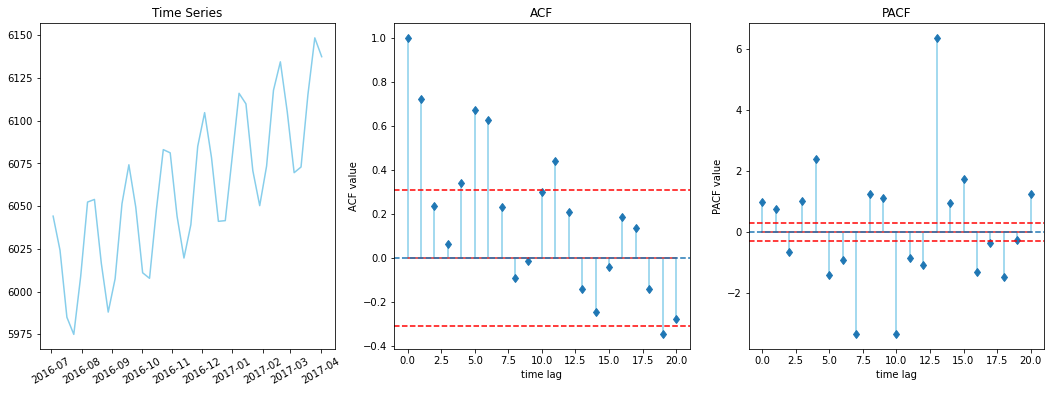

In [6]:
numeroRecord=40
x=np.arange(0,numeroRecord)
y1=x*2.8 + 4.3
y2=np.cos(20*x)*39
y3=np.random.randn(1, numeroRecord)


y=y1+y2+y3
y=np.transpose(y)
y=y+6000

addSeries = pd.DataFrame(y, index = pd.date_range('7/1/2016', freq = 'w', periods = numeroRecord), columns = ['Series'])
plt.rcParams['figure.figsize'] = [18, 6] #[width height] #set figure size
ts.ACF_PACF_plot(addSeries)

### Time series decomposition

Text(0, 0.5, 'value')

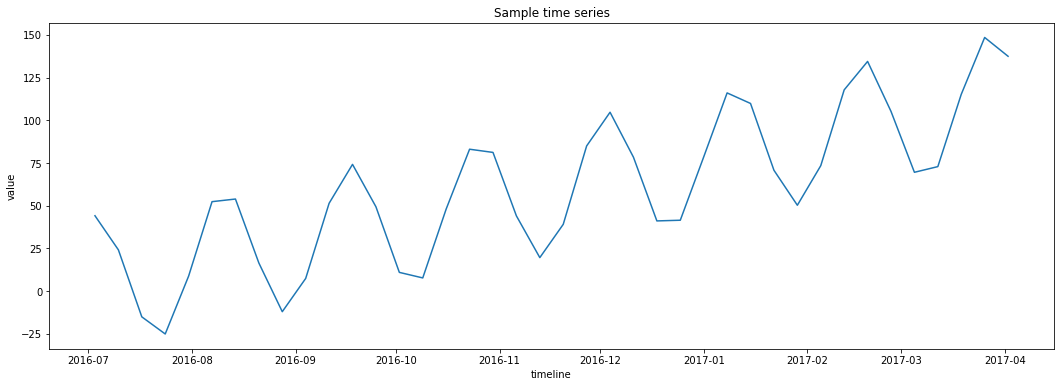

In [7]:
#Definition of the time series
y=y1+y2+y3
y=np.transpose(y)
addSeries = pd.DataFrame(y, index = pd.date_range('7/1/2016', freq = 'w', periods = numeroRecord), columns = ['Series'])
plt.plot(addSeries.index,addSeries.Series)
plt.title("Sample time series")
plt.xlabel('timeline')
plt.ylabel('value')

Text(0.5, 1.0, 'Residuals: seasonality + random')

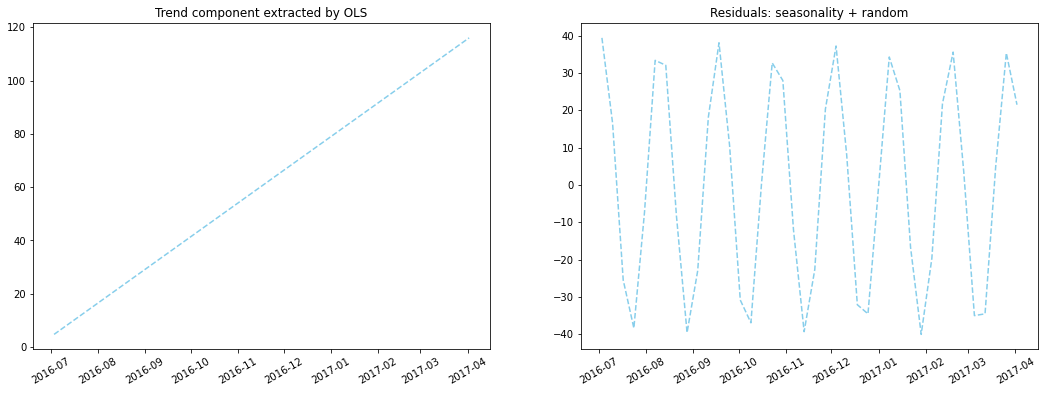

In [8]:
# Extract the trend component assuming it being linear
import sklearn.linear_model as lm #import 

regr = lm.LinearRegression()
x=x.reshape(-1,1)
y=y.reshape(-1,1)
lr=regr.fit(x,y)
y_pred=lr.predict(x)


# plot the trends and the residuals
plt.subplot(121) 
trend = pd.DataFrame(y_pred, index = pd.date_range('7/1/2016', freq = 'w', periods = numeroRecord), columns = ['Series'])
plt.plot(trend.Series,'k--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Trend component extracted by OLS')

#traccio i residui
plt.subplot(122) 
residuals=y-y_pred
trend = pd.DataFrame(residuals, index = pd.date_range('7/1/2016', freq = 'w', periods = numeroRecord), columns = ['Series'])
plt.plot(trend.Series,'k--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Residuals: seasonality + random')

Text(0.5, 1.0, 'Seasonal component - residuals')

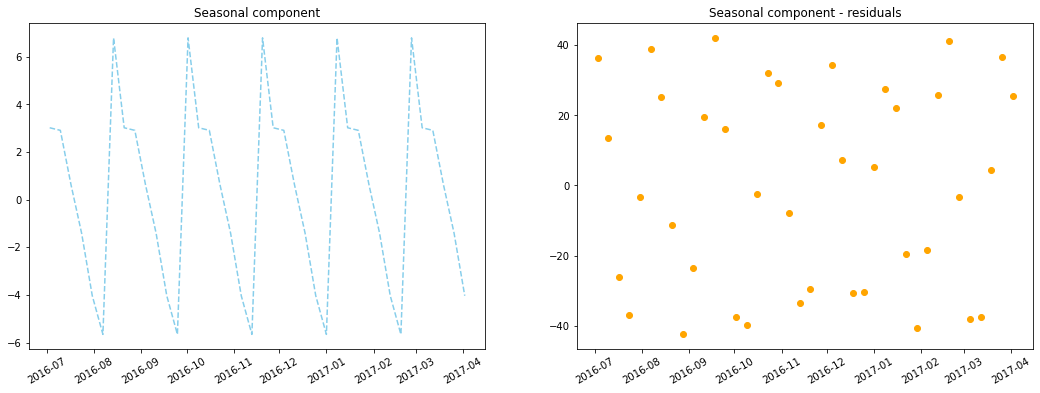

In [9]:
#extract the seasonal component with averaging
season_frequency=7
residuals_S=residuals

#fill using nan values
numeroRecord=len(y)
divisibile=season_frequency-numeroRecord%season_frequency
if divisibile!=0:
    for i in range(0,divisibile):
        residuals_S=np.append(residuals_S,np.nan)
        
numeroColonne= int(len(residuals_S)/season_frequency)  
residuals_S=residuals_S.reshape(season_frequency,numeroColonne)

season=np.nanmean(residuals_S, axis=1)
season=np.tile(season,numeroColonne)
for i in range(0,divisibile):
        season=season[0:-1]
        
plt.subplot(121) 
season = pd.DataFrame(season, index = pd.date_range('7/1/2016', freq = 'w', periods = numeroRecord), columns = ['Series'])
plt.plot(season.Series,'k--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Seasonal component')  

#plot the residuals
plt.subplot(122) 
residuals=residuals-season
residuals = pd.DataFrame(residuals, index = pd.date_range('7/1/2016', freq = 'w', periods = numeroRecord), columns = ['Series'])
plt.scatter(residuals.Series.index,residuals.Series.values, marker='o',color='orange')
plt.xticks(rotation=30)
plt.title('Seasonal component - residuals') 

### Forecast a time series using ARIMA models

In [10]:
#generate the time series
numeroRecord=50
x=np.arange(0,numeroRecord)
y1=0.2*x+3
y2=np.cos(0.005*x)*20
y3=np.random.randn(1, numeroRecord)

y=y1+y2+y3
y=np.transpose(y)
#y=y+6000
addSeries = pd.DataFrame(y, index = pd.date_range('7/1/2016', freq = 'w', periods = numeroRecord), columns = ['Series'])


C:\Users\aletu\.conda\envs\logproj\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
..\logproj\stat_time_series.py:115: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag_acf,linefmt='skyblue',markerfmt='d')
..\logproj\stat_time_series.py:125: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag_pacf,linefmt='skyblue',mar

(<matplotlib.axes._subplots.AxesSubplot at 0x1750c85d2b0>,
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64),
 array([ 1,  2,  3, 20, 21], dtype=int64))

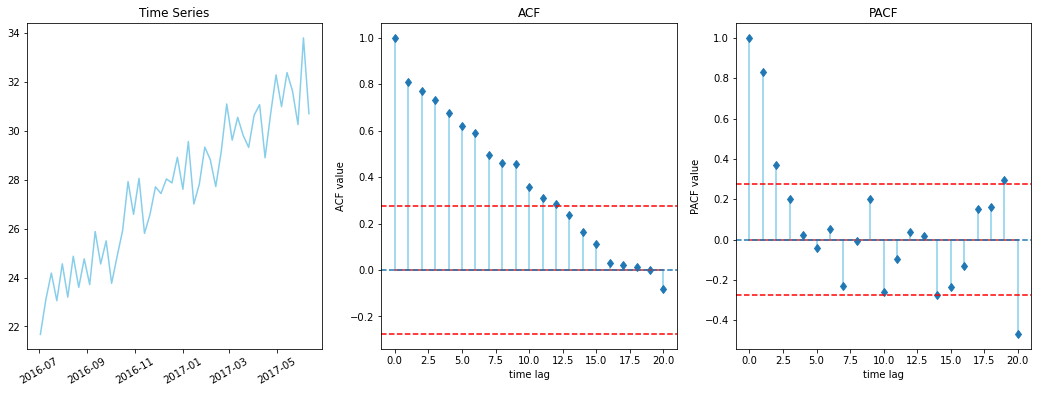

In [11]:
#represent ACF and PACF
plt.rcParams['figure.figsize'] = [18, 6] #[width height] #set figure size
ts.ACF_PACF_plot(addSeries)

### Detrend the series

In [12]:
#detrend the series
from statsmodels.tsa.stattools import adfuller
regr = lm.LinearRegression()
x=x.reshape(-1,1)
y=y.reshape(-1,1)
lr=regr.fit(x,y)
y_pred=lr.predict(x)
residuals=y-y_pred
residuals=residuals-min(residuals)
residuals=pd.DataFrame(residuals, index = pd.date_range('7/1/2016', freq = 'w', periods = numeroRecord), columns = ['Series'])




ADF Statistic: -9.036832
p-value: 0.000000
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599
The series is stationary


C:\Users\aletu\.conda\envs\logproj\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
..\logproj\stat_time_series.py:115: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag_acf,linefmt='skyblue',markerfmt='d')
..\logproj\stat_time_series.py:125: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag_pacf,linefmt='skyblue',mar

(<matplotlib.axes._subplots.AxesSubplot at 0x17506432c18>,
 array([1], dtype=int64),
 array([ 1, 10], dtype=int64))

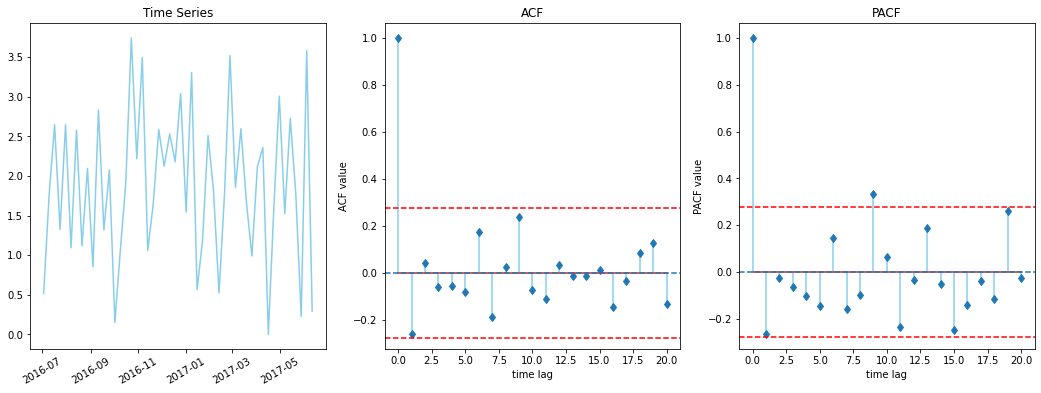

In [13]:
#check the series for stationarity
result=adfuller(residuals.iloc[:,0].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if result[1]<0.05:
    print('The series is stationary')
else:
    print('The series is not stationary')
    
ts.ACF_PACF_plot(residuals)

### Use transformation for stationarity

C:\Users\aletu\.conda\envs\logproj\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
..\logproj\stat_time_series.py:115: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag_acf,linefmt='skyblue',markerfmt='d')
..\logproj\stat_time_series.py:125: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag_pacf,linefmt='skyblue',mar

(<matplotlib.axes._subplots.AxesSubplot at 0x1750dc6bb70>,
 array([1], dtype=int64),
 array([ 1, 10, 14], dtype=int64))

<Figure size 1296x432 with 0 Axes>

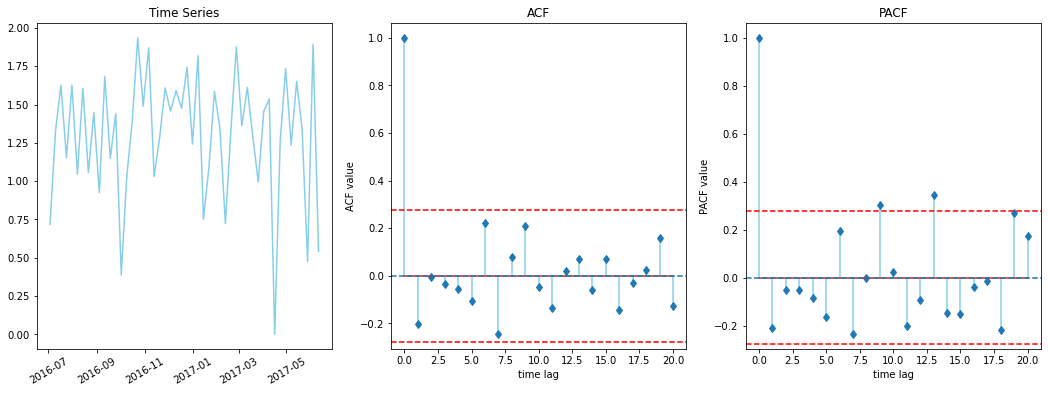

In [14]:
#power or log transformation to make the series stationary
log_series = residuals.apply(lambda x: x**.5)
plt.figure()
log_series.plot()


ts.ACF_PACF_plot(log_series)

In [15]:
#test for stationarity
result=adfuller(log_series.iloc[:,0].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if result[1]<0.05:
    print('The series is stationary')
else:
    print('The series is not stationary')

ADF Statistic: -8.442155
p-value: 0.000000
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599
The series is stationary


### Build the ARIMA model

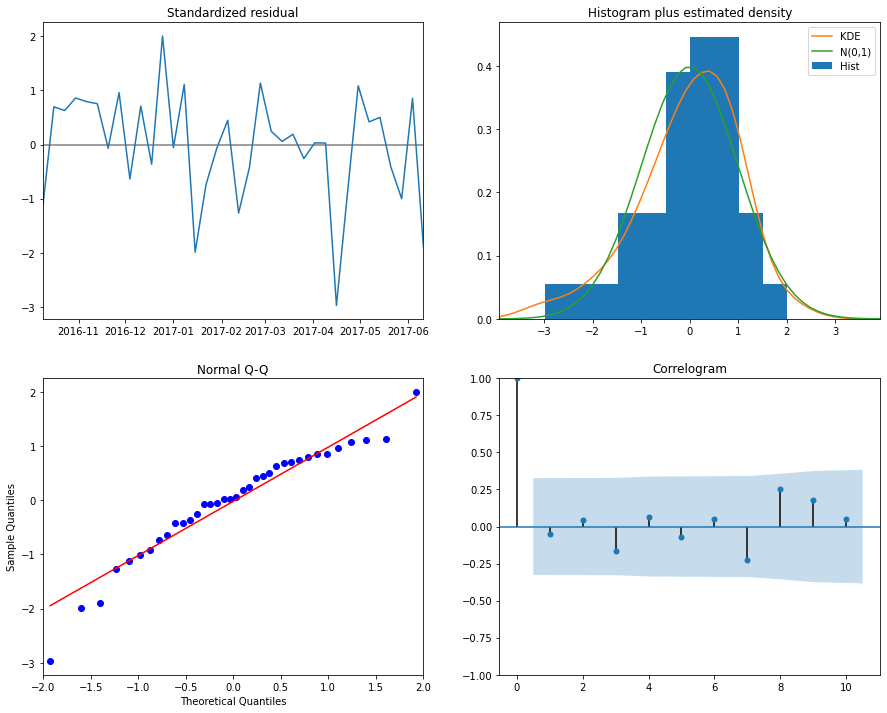

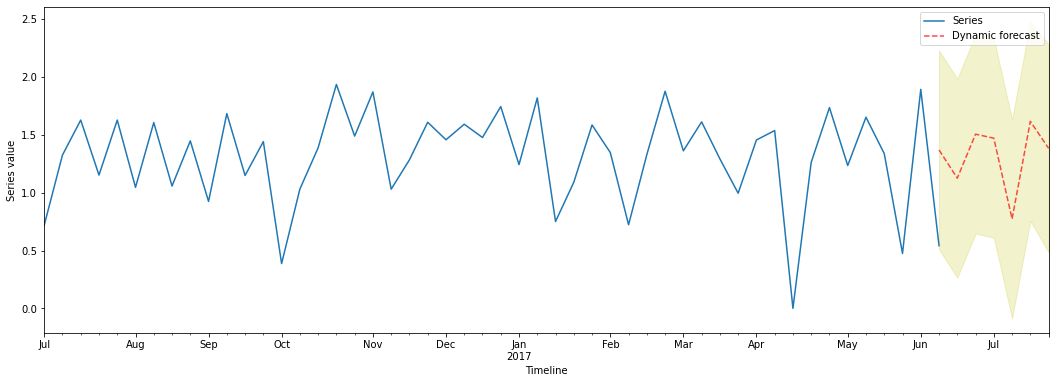

In [16]:
# In[1]: apply ARIMA
addSeries=log_series
result=ts.autoSARIMAXfit(addSeries,0,2,6)
results=result.fit()
results.plot_diagnostics(figsize=(15, 12))
plt.show()


pred = results.get_prediction(start=len(addSeries)-1,end=len(addSeries)+5, dynamic=True)
pred_ci = pred.conf_int()

ax = addSeries.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Dynamic forecast', color='r', style='--', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='y', alpha=.2)

ax.set_xlabel('Timeline')
ax.set_ylabel('Series value')
plt.legend()

plt.show()

### Use Fourier analysis to detect seasonality

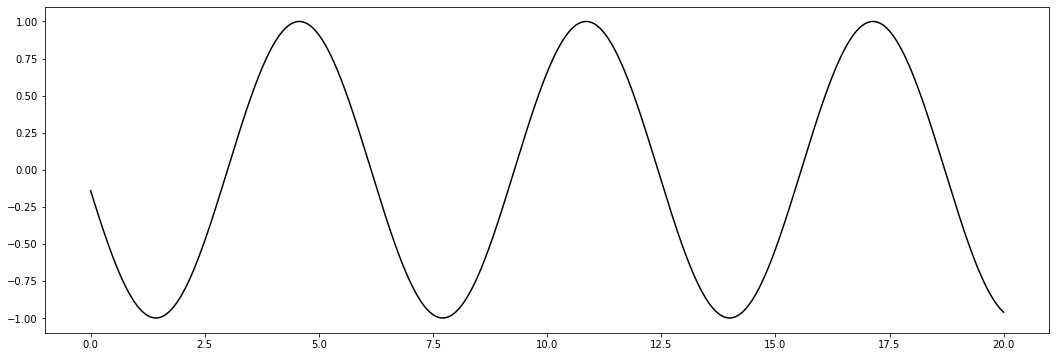

In [17]:
#example of a periodic signal
x=np.linspace(0,20,10000)
y=np.sin(x-3)
plt.plot(x,y,'k')

Text(0.5, 1.0, 'Samples')

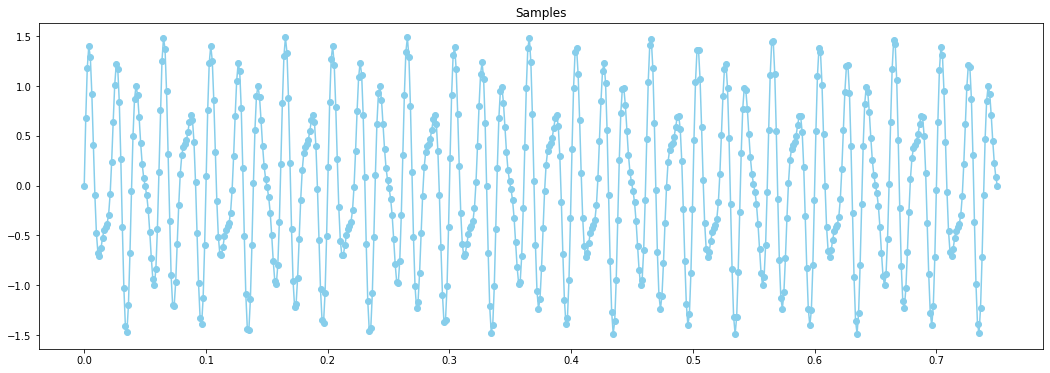

In [18]:
#define a signal
N=600
T = 1.0 / 800.0
x=np.linspace(0,N*T,N)
y=np.sin(50*2*np.pi*x)+0.5*np.sin(80*2*np.pi*x)


#plot samples (Figure 19)
plt.plot(x,y,color='skyblue',marker='o')
plt.title('Samples')




Text(0.5, 1.0, 'Amplitude spectrum')

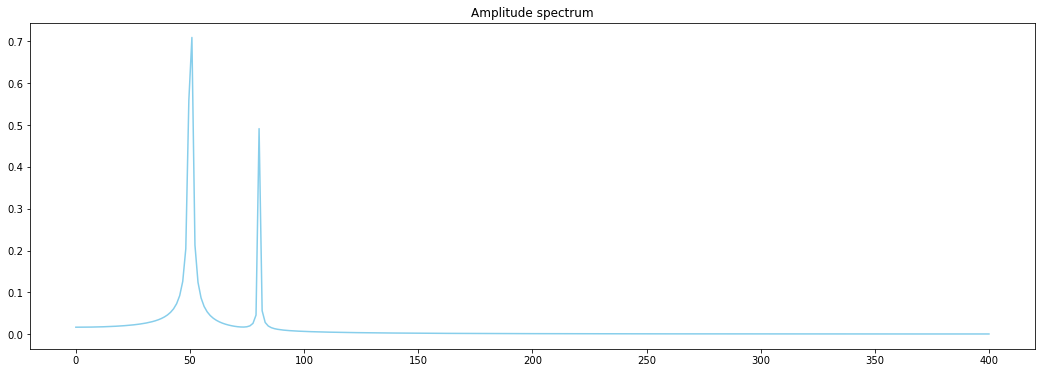

In [19]:
#compute the Fourier Transform
from scipy.fftpack import fft



plt.figure()
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

#plot fft
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]),color='skyblue')
plt.title('Amplitude spectrum')

In [20]:
ts.fourierAnalysis(addSeries.Series.values)


,Frequency_domain_value,Time_domain_value,Amplitude,perc,cumsum
17,0.354167,2.823529,0.212604,0.088972,0.088972
16,0.333333,3.000000,0.200611,0.083953,0.172926
11,0.229167,4.363636,0.196768,0.082345,0.255271
24,0.500000,2.000000,0.181860,0.076106,0.331377
18,0.375000,2.666667,0.151110,0.063238,0.394615
5,0.104167,9.600000,0.150369,0.062928,0.457543
7,0.145833,6.857143,0.143718,0.060144,0.517687
12,0.250000,4.000000,0.128169,0.053637,0.571324
1,0.020833,48.000000,0.115606,0.048380,0.619704
6,0.125000,8.000000,0.105366,0.044095,0.663799
